Analytics Vidhya
    
    AUTHOR: Kiran Parte

### Dimensionality Reduction: Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", "datasets")
data = iris.data

In [3]:
print(data.shape)
data.head(5)

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Separating out the features
x = data.iloc[:,0:-1]
# Separating out the target
y = data.loc[:,'Species']

In [5]:
total_components = x.shape[1]

In [6]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3
0,-2.264703,0.480027,0.127706,-0.024168
1,-2.080961,-0.674134,0.234609,-0.103007
2,-2.364229,-0.341908,-0.044201,-0.028377
3,-2.299384,-0.597395,-0.091290,0.065956
4,-2.389842,0.646835,-0.015738,0.035923


In [8]:
print("The eigen values for the covariance matrix of our iris data are", list(np.round(pca.explained_variance_, decimals=5)))

The eigen values for the covariance matrix of our iris data are [2.93809, 0.92016, 0.14774, 0.02085]


In [9]:
for i in range(0, total_components):
  print("The percentage of variance explained by principal component", i+1, "is", format(pca.explained_variance_ratio_[i]*100,'.0f'),'%')

The percentage of variance explained by principal component 1 is 73 %
The percentage of variance explained by principal component 2 is 23 %
The percentage of variance explained by principal component 3 is 4 %
The percentage of variance explained by principal component 4 is 1 %


In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

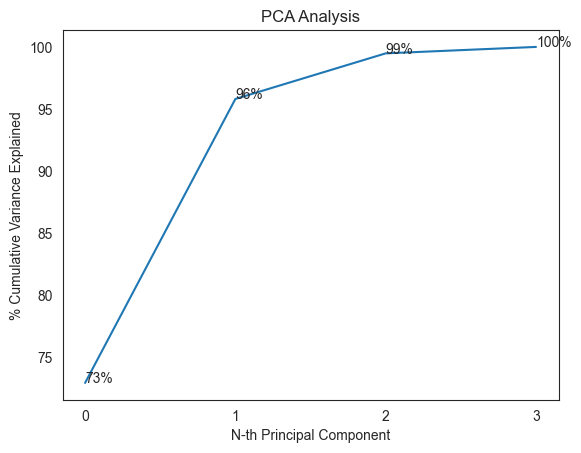

In [11]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

In [12]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [13]:
# Select the number of components
num_components = 2
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Principal component 1,0.521066,0.269347,0.580413,0.564857
Principal component 2,0.377418,0.923296,0.024492,0.066942


/var/folders/4_/vzt09tw95s98s5r46z9wkqz00000gn/T/ipykernel_32602/2774260703.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pc_df.iloc[0:1],ci=None)


Text(0, 0.5, 'feature importance for PC1')

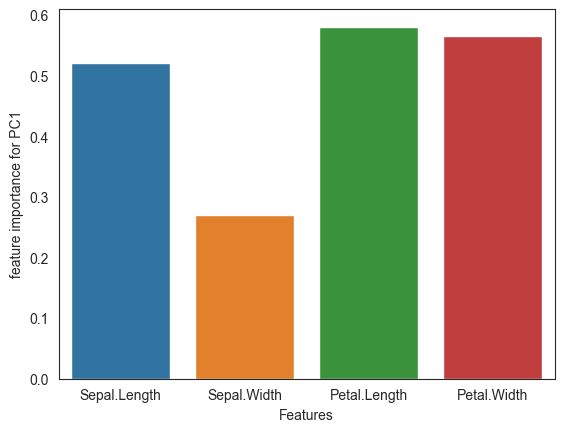

In [14]:
sns.barplot(data=pc_df.iloc[0:1],ci=None)
plt.xlabel('Features')
plt.ylabel('feature importance for PC1')

/var/folders/4_/vzt09tw95s98s5r46z9wkqz00000gn/T/ipykernel_32602/2339782516.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pc_df.iloc[1:2],ci=None)


Text(0, 0.5, 'feature importance for PC2')

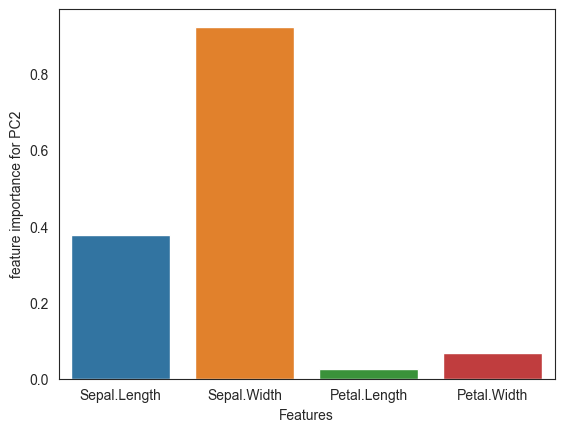

In [15]:
sns.barplot(data=pc_df.iloc[1:2],ci=None)
plt.xlabel('Features')
plt.ylabel('feature importance for PC2')

In [16]:
def myplot(score,coeff,labels=None,out=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    sns.scatterplot(x=xs*scalex, y=ys*scaley, hue=out, legend=False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

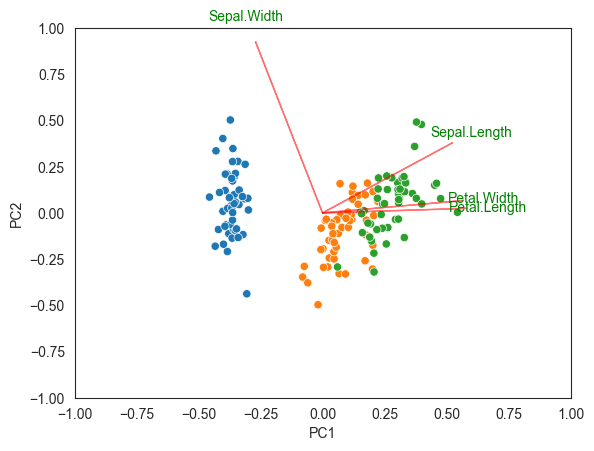

In [17]:
# Call the function. Use only the 2 PCs.
myplot(np.array(x_projected.iloc[:,0:2]),np.transpose(pca.components_[0:2, :]),labels=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], out=y)

Text(0.5, 1.0, 'Before applying PCA')

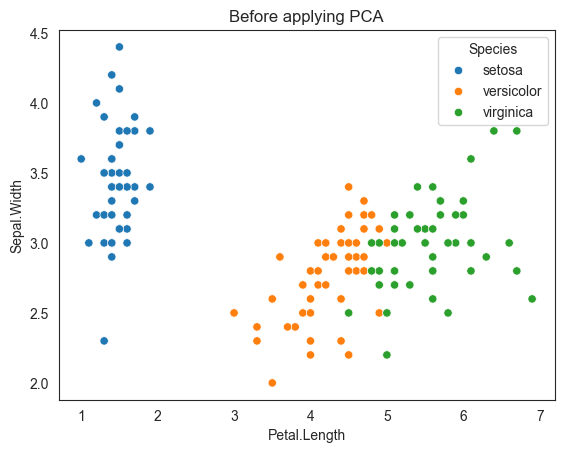

In [18]:
sns.scatterplot(x=data['Petal.Length'],y=data['Sepal.Width'],hue=y)
plt.title('Before applying PCA')

Text(0, 0.5, 'Projected data in PC2')

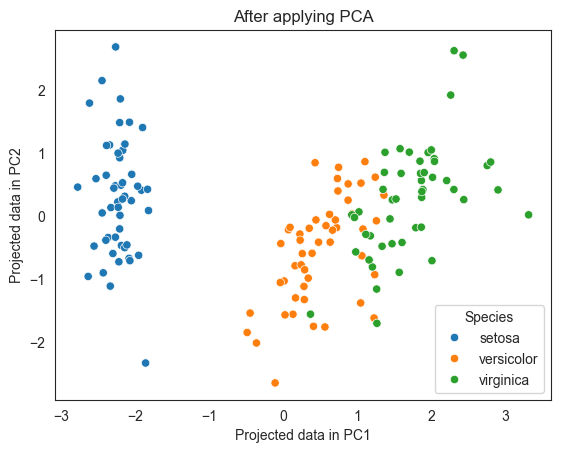

In [19]:
sns.scatterplot(x=x_projected[0],y=x_projected[1],hue=y)
plt.title('After applying PCA')
plt.xlabel('Projected data in PC1')
plt.ylabel('Projected data in PC2')

In [20]:
# As the cumulative percentage variance for principal components 1 and 2 is 96%, only their projections will be used in the new dataset
new_data = x_projected.iloc[:,0:num_components]
# Assign names to projections on components
new_data.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)]
new_data = pd.concat([new_data,y], axis=1)
new_data

,PC1,PC2,Species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


In [21]:
new_data.to_csv('iris_afterPCA.csv')